In [52]:
import numpy as np
import pandas as pd
import matplotlib
import math
import skbio
current_file="indel_rearange_combined.csv"

In [40]:
df=pd.read_excel("currentdata.xlsx")
df2=pd.read_csv(current_file)
div=pd.read_csv(current_file)
reyni=pd.read_csv(current_file)
#df=df.transpose()
df.head()
df2.head()
div.head()

,type,NHLC_WT,NHLC_1A,NHLC_1B,NHLC_2A,NHLC_2B,NHLC_3A,NHLC_3B,NHLC_4B,NHLC_4C,...,NHLC_17A,NHLC_17B,NHLC_18A,NHLC_18B,NHLC_19A,NHLC_19B,NHLC_20A,NHLC_20B,NHLC_21A,NHLC_21B
0,p1p7del,4,0,0,0,0,0,2,0,0,...,0,19,1,0,0,0,0,3,0,2
1,p1p6del,2,0,0,0,0,0,0,0,0,...,0,2,2,0,0,0,0,0,3,0
2,p1p4del,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,p1p5del,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,p2p6del,10,0,0,0,0,0,0,0,2,...,0,0,2,0,0,0,418,400,175,194


In [41]:
for i in range(len(df["Type"])): #cleaning extra space character from type field
    value = df["Type"][i]
    df["Type"][i] = value[:-1]
df.set_index("Type", inplace=True)

/home/nekose/anaconda3/envs/main/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
df2.set_index("type", inplace=True)


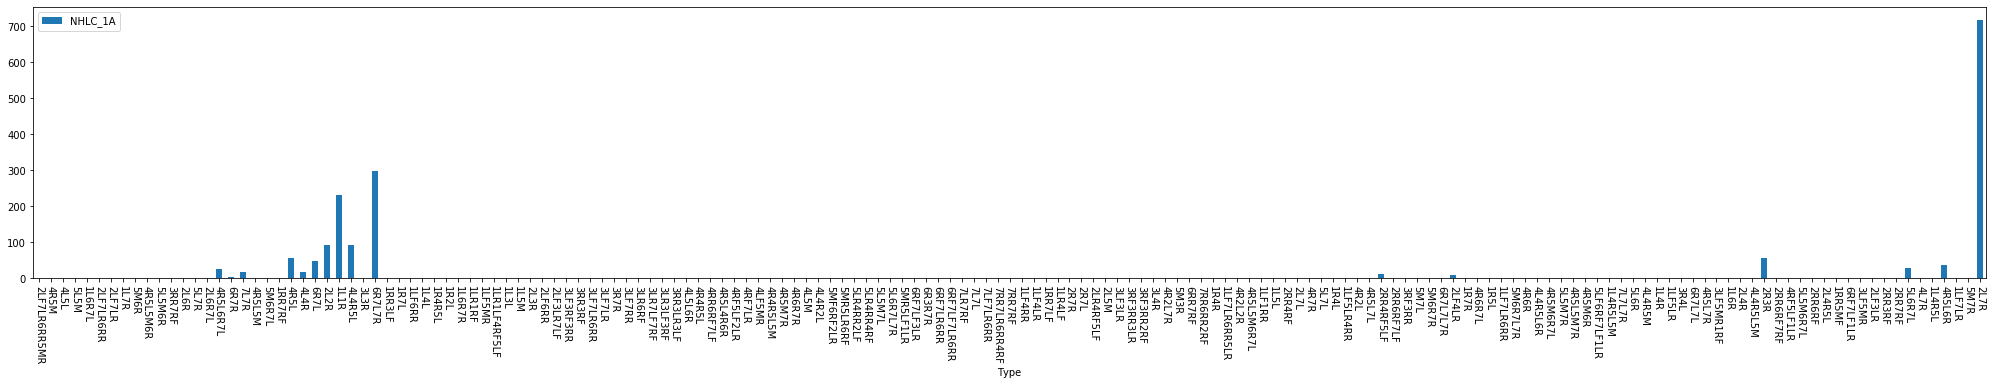

In [43]:
#df["NHLC_WT"].astype(int)
ax = df.plot.bar(y="NHLC_1A", figsize = (35,5), rot=-90)
#df=df.astype(int)
#print(df.dtypes)

In [44]:
ax = df2.plot.bar(y="1A", figsize = (35,5), rot=-90)

KeyError: '1A'

In [45]:
#adding one to every field for psuedocounting purposes
KLdf = df2
KLdf = KLdf.astype("float64")
for key, row in KLdf.iteritems():
    for key2, row2 in row.iteritems():
        KLdf.loc[key2][key] += 1
        
for key, row in KLdf.iteritems():
    for key2, row2 in row.iteritems():
        if KLdf.loc[key2][key] <= 0:
            print("error in",key2,key)

In [46]:
#Convert dataframes to frequencies of each column
for key, row in KLdf.iteritems():
    for key2, row2 in row.iteritems():
        value = KLdf.loc[key2][key]
        KLdf.loc[key2][key] = (value / sum(row))

In [47]:
# calculating KL distance between two distrubtions. Distance(P||Q) = summation[Pi*Log2(Pi/Qi)]

KLresults = {}
for key, row in KLdf.iteritems():
    for key2, row2 in KLdf.iteritems():
        if key == key2:
            continue
        data = row * np.log2(row/row2)
        resultkey = key + "-" + key2
        KLresults[resultkey] = sum(data)
        
        

In [48]:
resultframe = pd.DataFrame.from_dict(KLresults, orient = 'index', columns = ["KL_Distance"])

In [49]:
#Pulling values from the NHLC_16B samples:
print(resultframe[resultframe.index.str.contains("16B-")])

                   KL_Distance
NHLC_16B-NHLC_WT      9.231185
NHLC_16B-NHLC_1A      8.250919
NHLC_16B-NHLC_1B      8.449011
NHLC_16B-NHLC_2A      9.412669
NHLC_16B-NHLC_2B      9.534836
NHLC_16B-NHLC_3A      9.037348
NHLC_16B-NHLC_3B      8.313250
NHLC_16B-NHLC_4B      9.522262
NHLC_16B-NHLC_4C      9.275238
NHLC_16B-NHLC_5A      8.759774
NHLC_16B-NHLC_5B      8.808842
NHLC_16B-NHLC_6A      8.853614
NHLC_16B-NHLC_6B      8.357291
NHLC_16B-NHLC_7A      9.082098
NHLC_16B-NHLC_7B      8.203893
NHLC_16B-NHLC_8A      9.027970
NHLC_16B-NHLC_8B      9.382457
NHLC_16B-NHLC_9A      9.493236
NHLC_16B-NHLC_9B      9.363718
NHLC_16B-NHLC_10A     9.024541
NHLC_16B-NHLC_10B     9.086329
NHLC_16B-NHLC_11A     9.166514
NHLC_16B-NHLC_11B     9.270596
NHLC_16B-NHLC_13A     6.952634
NHLC_16B-NHLC_13B     9.465226
NHLC_16B-NHLC_14A     9.329618
NHLC_16B-NHLC_14B     9.392799
NHLC_16B-NHLC_15D     9.483561
NHLC_16B-NHLC_16A     4.333650
NHLC_16B-NHLC_17A     9.030496
NHLC_16B-NHLC_17B     8.975384
NHLC_16B

,KL_Distance
NHLC_WT,0.031198
NHLC_1A,4.427305
NHLC_1B,3.907829
NHLC_2A,-0.012574
NHLC_2B,-0.013196
NHLC_3A,0.375171
NHLC_3B,0.300440
NHLC_4B,0.028368
NHLC_4C,0.154307
NHLC_5A,2.118634


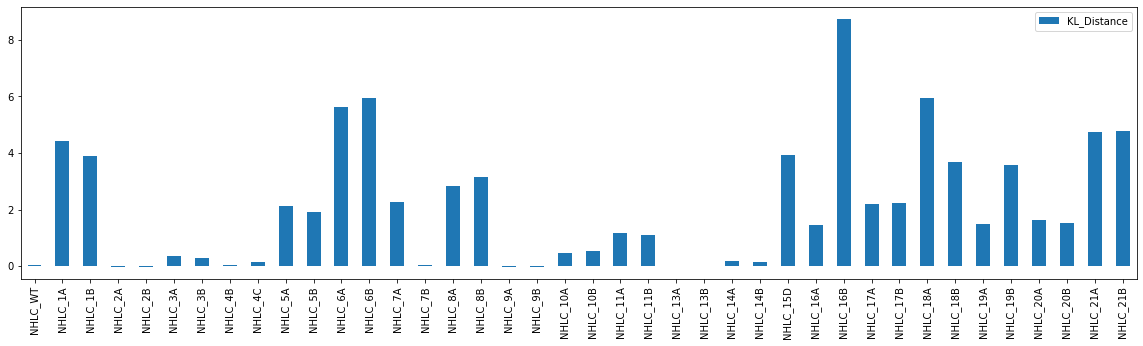

In [50]:
groups = {}
groupcount = {}
finalavg = {}
for key, row in resultframe.iteritems():
    for key2, row2 in row.iteritems():
        group = key2.split("-")[0]
        groups[group] = 0
        groupcount[group] = 0
    for key2, row2 in row.iteritems():
        group = key2.split("-")[0]
        groups[group] += row2
        groupcount[group] += 1

for key,value in groups.items():
    finalavg[key] = value/groupcount[key]

avgresults = pd.DataFrame.from_dict(finalavg, orient = 'index', columns = ["KL_Distance"])
display(avgresults)
ax = avgresults.plot.bar(y="KL_Distance", figsize = (20,5), rot=90)

In [51]:
print(skbio.diversity.get_alpha_diversity_metrics())
print(skbio.diversity.get_beta_diversity_metrics())

['ace', 'berger_parker_d', 'brillouin_d', 'chao1', 'chao1_ci', 'dominance', 'doubles', 'enspie', 'esty_ci', 'faith_pd', 'fisher_alpha', 'gini_index', 'goods_coverage', 'heip_e', 'kempton_taylor_q', 'lladser_ci', 'lladser_pe', 'margalef', 'mcintosh_d', 'mcintosh_e', 'menhinick', 'michaelis_menten_fit', 'observed_otus', 'osd', 'pielou_e', 'robbins', 'shannon', 'simpson', 'simpson_e', 'singles', 'strong']
['unweighted_unifrac', 'weighted_unifrac']


In [17]:
display(div)
div = div.drop("type", axis=1)
div = div.transpose()
display(div)

,type,WT,1A,1B,2A,2B,3A,3B,4B,4C,...,17A,17B,18A,18B,19A,19B,20A,20B,21A,21B
0,p1p7del,12.0,0.0,23.0,0.0,6.0,0.0,6.0,0.0,0.0,...,0.0,61.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0
1,p1p6del,34.0,0.0,18.0,0.0,10.0,0.0,18.0,6.0,0.0,...,4.0,2.0,53.0,0.0,8.0,0.0,0.0,0.0,59.0,0.0
2,p1p4del,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,p1p5del,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,p2p6del,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,746.0,743.0,178.0,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,7_A_ins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333,7_10bp_ins_20bp_del,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
334,7_49bp_del_10bp_ins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,7_35bp_del_8bp_ins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,327,328,329,330,331,332,333,334,335,336
WT,12.0,34.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1A,0.0,0.0,0.0,0.0,0.0,940.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1B,23.0,18.0,0.0,0.0,0.0,1007.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2A,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2B,6.0,10.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3B,6.0,18.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4B,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
diversity_results= pd.DataFrame()
diversity_results["Observed_Otus"]=skbio.diversity.alpha_diversity("observed_otus",div, ids=div.index)
diversity_results["Simpsons_Index"]=skbio.diversity.alpha_diversity("simpson",div, ids=div.index)
diversity_results["Simspons_Evenness_Measure_E"]=skbio.diversity.alpha_diversity("simpson_e",div, ids=div.index)
diversity_results["Shannon_Entropy"]=skbio.diversity.alpha_diversity("shannon",div, ids=div.index)
diversity_results["Fisher_Alpha"]=skbio.diversity.alpha_diversity("fisher_alpha",div, ids=div.index)


TypeError: Cannot cast array from dtype('float64') to dtype('int64') according to the rule 'safe'

In [19]:
display(diversity_results)
#diversity_results.plot(figsize = (40,5), rot=90)

""


In [20]:
#Convert reyni dataframes to frequencies of each column
reyni.set_index("type", inplace=True)
display(reyni)
reynisums=pd.Series(reyni.sum())
reynifreq = reyni / reynisums


,WT,1A,1B,2A,2B,3A,3B,4B,4C,5A,...,17A,17B,18A,18B,19A,19B,20A,20B,21A,21B
type,,,,,,,,,,,,,,,,,,,,,
p1p7del,12.0,0.0,23.0,0.0,6.0,0.0,6.0,0.0,0.0,0.0,...,0.0,61.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0
p1p6del,34.0,0.0,18.0,0.0,10.0,0.0,18.0,6.0,0.0,0.0,...,4.0,2.0,53.0,0.0,8.0,0.0,0.0,0.0,59.0,0.0
p1p4del,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
p1p5del,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
p2p6del,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,746.0,743.0,178.0,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7_A_ins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7_10bp_ins_20bp_del,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7_49bp_del_10bp_ins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
alphalist = [0,.99999,2,3,4]
reyniresults={}
for column in reynifreq:
    #print(reynifreq[column])
    listresults=[]
    for alpha in alphalist:
        columnsum=0
        for row in reynifreq[column]:
            if row > 0:
                columnsum+=row**alpha
                #print(columnsum)
            else:
                continue
        columnsum=columnsum**(1/(1-alpha))
        listresults.append(columnsum)
    reyniresults[column]=listresults
display(reyniresults)

{'WT': [36.0,
  7.450523715354968,
  5.444772595935127,
  4.532785129327909,
  4.036109909706213],
 '1A': [11.0,
  2.7829800222666194,
  2.386295629933713,
  2.279915872344738,
  2.2315000922487744],
 '1B': [19.0,
  3.0072680980504334,
  2.4417032322645356,
  2.335226023969481,
  2.293713775374382],
 '2A': [5.0,
  1.027065294036544,
  1.0067900554600862,
  1.0050912087226458,
  1.0045242437653994],
 '2B': [7.0,
  1.1093107563470181,
  1.0311114623953164,
  1.0232822205351229,
  1.0206688453392234],
 '3A': [9.0,
  1.7492953100773527,
  1.4177947386323095,
  1.327416674642766,
  1.2891905718789347],
 '3B': [17.0,
  2.753361608764934,
  1.7178812524261724,
  1.5302124449892014,
  1.4619078078702639],
 '4B': [14.0,
  1.3557527257945279,
  1.1257298481890763,
  1.0939570676629928,
  1.0831130033839558],
 '4C': [17.0,
  3.0586028935440384,
  2.3578038469939733,
  2.139789350031113,
  2.0291273005855555],
 '5A': [10.0,
  2.512225545229183,
  1.91403931013329,
  1.7355260401113184,
  1.6520774

In [22]:
'''
alpha = [0,.99999999999999,2,3,4]

reyniresults={}
for column in reynifreq:
    columnresults = []
    #print(column)
    for num in alpha:
        print("Alpha = ",num)
        #results = (sum(reynifreq[column] ** num)) ** (1/1-num)
        
        display(reynifreq[column]**num,reynifreq[column])
        #results = sum(reynifreq[column] ** num)
        #print("Diversity =", results)
        #columnresults.append(results)
    reyniresults[column]=columnresults
display(reyniresults)    
'''

'\nalpha = [0,.99999999999999,2,3,4]\n\nreyniresults={}\nfor column in reynifreq:\n    columnresults = []\n    #print(column)\n    for num in alpha:\n        print("Alpha = ",num)\n        #results = (sum(reynifreq[column] ** num)) ** (1/1-num)\n        \n        display(reynifreq[column]**num,reynifreq[column])\n        #results = sum(reynifreq[column] ** num)\n        #print("Diversity =", results)\n        #columnresults.append(results)\n    reyniresults[column]=columnresults\ndisplay(reyniresults)    \n'

In [23]:
display(reynifreq)

,WT,1A,1B,2A,2B,3A,3B,4B,4C,5A,...,17A,17B,18A,18B,19A,19B,20A,20B,21A,21B
type,,,,,,,,,,,,,,,,,,,,,
p1p7del,0.002016,0.0,0.010718,0.0,0.002284,0.0,0.002227,0.000000,0.000000,0.0,...,0.000000,0.020105,0.000750,0.0,0.000000,0.0,0.000000,0.001234,0.000000,0.000436
p1p6del,0.005712,0.0,0.008388,0.0,0.003807,0.0,0.006682,0.002235,0.000000,0.0,...,0.001265,0.000659,0.019873,0.0,0.003012,0.0,0.000000,0.000000,0.012666,0.000000
p1p4del,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.004826,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
p1p5del,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.001265,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000215,0.000000
p2p6del,0.002184,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000558,0.0,...,0.000000,0.000000,0.001500,0.0,0.000000,0.0,0.329069,0.305510,0.038214,0.043336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7_A_ins,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7_10bp_ins_20bp_del,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7_49bp_del_10bp_ins,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [24]:
reynidf = pd.DataFrame.from_dict(data=reyniresults, orient='columns')
reynidfl = pd.DataFrame.from_dict(data=reyniresults, orient='index', columns=alphalist)
display(reynidfl)

,0.00000,0.99999,2.00000,3.00000,4.00000
WT,36.0,7.450524,5.444773,4.532785,4.036110
1A,11.0,2.782980,2.386296,2.279916,2.231500
1B,19.0,3.007268,2.441703,2.335226,2.293714
2A,5.0,1.027065,1.006790,1.005091,1.004524
2B,7.0,1.109311,1.031111,1.023282,1.020669
3A,9.0,1.749295,1.417795,1.327417,1.289191
3B,17.0,2.753362,1.717881,1.530212,1.461908
4B,14.0,1.355753,1.125730,1.093957,1.083113
4C,17.0,3.058603,2.357804,2.139789,2.029127
5A,10.0,2.512226,1.914039,1.735526,1.652077


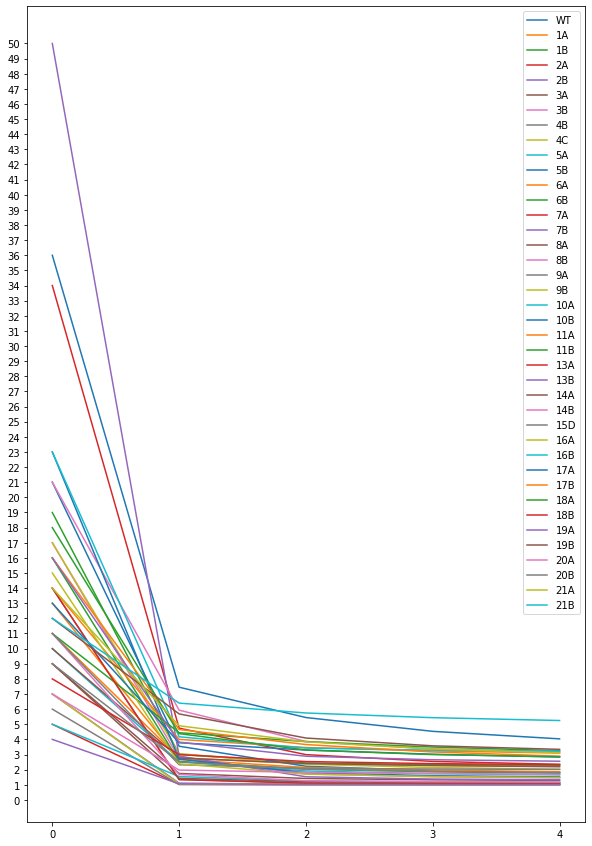

In [28]:
ax = reynidf.plot(figsize = (10,15), xticks=(0,1,2,3,4),yticks=(range(0,51)))
ax.figure.savefig('figure.png')